$$
\theta''(t)+\omega^2 (1+\varepsilon \cos(t)) \sin(\theta(t))=0,
$$
avec conditions initiales $\theta(0) = \frac{\pi}{8}$ et $\theta'(0)=0$ et où $\omega$ et $\varepsilon$ sont des constantes.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

omega = 1
epsilon = 0.2
X0 = np.array([np.pi/8,0.])
T = 200
N = 3000

def f(t,X):
    return np.array([X[1], -omega**2*(1+epsilon*np.cos(t))*X[0]])

## schema d'Euler explicite
def Euler(X0,N,T):
    dt = T/N
    X = np.zeros([N+1,2])
    X[0] = X0
    ## boucle en temps
    for i in range(0,N):
        X[i+1] = X[i] + dt * f(i*dt,X[i])
    return X

X_Euler = Euler(X0,N,T)
sol_rk4 = integrate.solve_ivp(f,(0.,T),X0,max_step=T/N,rtol=1.,atol=1.) #par défaut, c’est un RK4



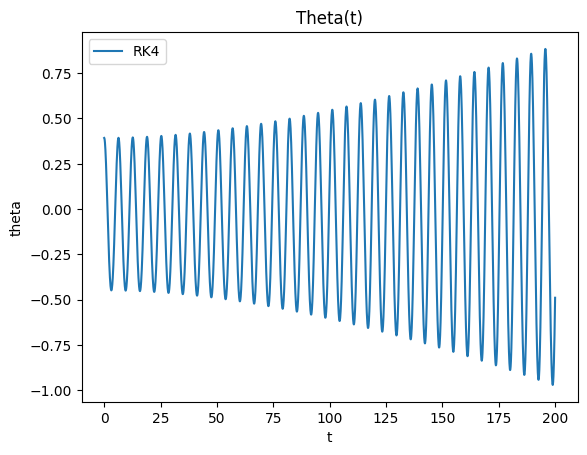

In [8]:
theta_Euler , omega_Euler = X_Euler[:,0] , X_Euler[:,1]
# temps
tps = np.linspace(0,T,N+1)

## affichage de theta
plt.figure()
#plt.plot(tps,theta_Euler,label="Euler explicite")
plt.plot(sol_rk4.t,sol_rk4.y[0],label="RK4")
plt.xlabel("t")
plt.ylabel("theta")
plt.title("Theta(t)")
plt.legend()
plt.show()